## Candidate Number: 555638

# Big Data Individual Assignment - UK Road Safety Dataset

In the group assignment, we conducted descriptive statistics on the dataset, exploratory data analysis and data preprocessing.

In my individual assginment, I will develop predictive models of accident severity based on chosen independent variables. Then I'll evaluate model and provide some key findings and possible future improvements.


**TABLE OF CONTENTS:**
1. Business Context and Objective
2. Data Preparation
3. Model Development
4. Model Evaluation
5. Key Findings
6. Possible future improvements


# **0. Importing libraries**

In [ ]:
# Silence warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# For data wrangling
import pandas as pd
import numpy as np

# For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#magic function for displaying plot in the notebook
%matplotlib inline

In [ ]:
# Set logging to print only error messages of sklearnex
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

In [ ]:
# Divide data into training and testing sets
from sklearn.model_selection import train_test_split

# Import cross_val_score for evaluating a model's performance with cross-validation
from sklearn.model_selection import cross_val_score

# Generate cross-validated estimates for each input data point
from sklearn.model_selection import cross_val_predict

# Encode categorical target variables into numerical labels
from sklearn.preprocessing import LabelEncoder

''' Import accuracy_score, precision_score, recall_score, make_scorer, and
f1_score to evaluate classification model performance'''
from sklearn.metrics import accuracy_score,precision_score,recall_score,make_scorer,f1_score

# Import confusion_matrix for evaluating classification accuracy
from sklearn.metrics import confusion_matrix

# Import ConfusionMatrixDisplay for visualising confusion matrices from classification predictions
from sklearn.metrics import ConfusionMatrixDisplay

'''Compute precision, recall, F1 score, and support for each class and
classification report for classification performance'''
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [ ]:
# For Baseline model
from sklearn.dummy import DummyClassifier

# For Logistic Regression
from sklearn.linear_model import LogisticRegression

# For K-nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# For Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier

# For Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

# For Linear and Kernelized Support Vector Machine
from sklearn.svm import LinearSVC,SVC

In [ ]:
# Import the Pipeline class from the imblearn.pipeline module
from imblearn.pipeline import Pipeline

# For Random Oversampling
# Import the RandomOverSampler class from imblearn.over_sampling module
from imblearn.over_sampling import RandomOverSampler

# For SMOTE
# Import the SMOTE class from the imblearn.over_sampling module
from imblearn.over_sampling import SMOTE

# For Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

# For Undersampling with Cluster Centroids
from imblearn.under_sampling import ClusterCentroids

In [ ]:
# Standardize the scale of features
from sklearn.preprocessing import normalize

In [ ]:
# Format data into tables
from tabulate import tabulate

In [ ]:
pip install scikit-optimize # Install scikit-optimize

In [ ]:
# Import Exhaustive GridSearchCV to explore predetermined parameter values for an estimator
from sklearn.model_selection import GridSearchCV

# Import RandomizedSearchCV for exploring random parameter combinations for an estimator
from sklearn.model_selection import RandomizedSearchCV

'''Import the BayesSearchCV class from the skopt module for hyperparameter
optimization using Bayesian optimization'''
from skopt import BayesSearchCV

In [ ]:
# Dumping models to files
import os
from joblib import dump

In [ ]:
# Import time module
from datetime import timedelta
import time
# Start the time to run this notebook
start_time = time.time()

# **1. Business Context and Objective**

The business goal of car insurance company is to develop models to predict the severity of accidents for individual drivers by utilising not just the surface-level details of accident,  but delve deeper into driver and casualty characteristics and vehicle specifications, given the context of UK road safety in 2022. The ultimate goal is to offer tailored insurance solutions that emphasize safety and reduce financial risks for both policyholders and the insurance provider.

# **2. Data Preparation**

We produced two dataframes: the training dataset and the testing dataset at the end of the group assignment.

In [ ]:
# Load trainset file into a dataframe
trainset = pd.read_csv("trainset.csv")

# load testset file into a dataframe
testset = pd.read_csv("testset.csv")

In [ ]:
# Display the first few rows of the trainset dataframe
trainset.head()

,age_of_casualty,longitude,latitude,age_of_driver,engine_power,speed_limit,sex_of_casualty_Male,sex_of_driver_Male,driver_home_area_type_Small town,driver_home_area_type_Urban area,...,vehicle_manoeuvre_group_Reversing,vehicle_manoeuvre_group_Slowing or stopping,vehicle_manoeuvre_group_Turning left,vehicle_manoeuvre_group_Turning right,vehicle_manoeuvre_group_U-turn,urban_or_rural_area_Urban,casualty_class_Passenger,casualty_class_Pedestrian,driver_experience_Senior,accident_severity
0,-0.371077,-1.754662,-1.456301,-0.932255,-0.691040,-1.084988,-1.279118,-1.706305,-0.219388,0.380235,...,-0.10117,-0.246097,-0.191555,-0.29277,-0.086929,0.624627,-0.486598,-0.280404,-1.098516,Slight
1,-0.900274,-0.182325,0.137674,-1.736697,0.301061,-0.361663,0.781789,0.586062,-0.219388,0.380235,...,-0.10117,-0.246097,-0.191555,-0.29277,-0.086929,0.624627,-0.486598,-0.280404,-1.098516,Slight
2,-5.225669,-0.944859,-0.727104,1.465422,-0.356355,0.361663,-1.279118,-1.706305,-0.219388,0.380235,...,-0.10117,-0.246097,-0.191555,3.41565,-0.086929,0.624627,2.055083,-0.280404,0.910319,Slight
3,-0.371077,-0.731280,-0.910028,-0.932255,0.161609,0.361663,0.781789,0.586062,-0.219388,0.380235,...,-0.10117,-0.246097,-0.191555,-0.29277,-0.086929,0.624627,-0.486598,-0.280404,-1.098516,Slight
4,0.767656,0.864824,-0.671114,0.798756,-1.307019,-1.084988,0.781789,0.586062,-0.219388,0.380235,...,-0.10117,-0.246097,-0.191555,-0.29277,-0.086929,0.624627,-0.486598,-0.280404,0.910319,Slight


In [ ]:
# Get the information about trainset dataframe
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 30 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   age_of_casualty                                      7600 non-null   float64
 1   longitude                                            7600 non-null   float64
 2   latitude                                             7600 non-null   float64
 3   age_of_driver                                        7600 non-null   float64
 4   engine_power                                         7600 non-null   float64
 5   speed_limit                                          7600 non-null   float64
 6   sex_of_casualty_Male                                 7600 non-null   float64
 7   sex_of_driver_Male                                   7600 non-null   float64
 8   driver_home_area_type_Small town                     7600 non-null  

In [ ]:
# Show the number of rows and columns of training dataset
trainset.shape

(7600, 30)

There are 7600 rows and 30 columns in 'trainset' dataframe.

In [ ]:
# Display the first few rows of the testset dataframe
testset.head()

,age_of_casualty,longitude,latitude,age_of_driver,engine_power,speed_limit,sex_of_casualty_Male,sex_of_driver_Male,driver_home_area_type_Small town,driver_home_area_type_Urban area,...,vehicle_manoeuvre_group_Reversing,vehicle_manoeuvre_group_Slowing or stopping,vehicle_manoeuvre_group_Turning left,vehicle_manoeuvre_group_Turning right,vehicle_manoeuvre_group_U-turn,urban_or_rural_area_Urban,casualty_class_Passenger,casualty_class_Pedestrian,driver_experience_Senior,accident_severity
0,-0.900274,1.981695,0.325728,1.932553,-0.212122,0.361663,-1.279118,0.586062,-0.219388,0.380235,...,-0.10117,-0.246097,-0.191555,-0.29277,-0.086929,0.624627,-0.486598,3.566288,0.910319,Slight
1,-3.950613,-0.248691,1.396185,-0.308282,-0.491026,-0.361663,0.781789,-1.706305,-0.219388,0.380235,...,-0.10117,-0.246097,-0.191555,-0.29277,-0.086929,0.624627,-0.486598,3.566288,-1.098516,Slight
2,0.330455,0.778142,-0.684811,0.134158,-0.242403,0.361663,0.781789,0.586062,-0.219388,0.380235,...,-0.10117,-0.246097,-0.191555,-0.29277,-0.086929,0.624627,-0.486598,-0.280404,-1.098516,Slight
3,-0.183846,-0.167100,0.562637,-0.647641,-0.134826,-0.361663,0.781789,0.586062,-0.219388,0.380235,...,-0.10117,-0.246097,-0.191555,-0.29277,-0.086929,0.624627,-0.486598,-0.280404,-1.098516,Slight
4,-0.732929,0.857911,-0.791037,-0.078320,-0.242403,-1.084988,-1.279118,0.586062,-0.219388,0.380235,...,-0.10117,4.063437,-0.191555,-0.29277,-0.086929,0.624627,2.055083,-0.280404,0.910319,Slight


In [ ]:
# Get the information about testset dataframe
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906 entries, 0 to 1905
Data columns (total 30 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   age_of_casualty                                      1906 non-null   float64
 1   longitude                                            1906 non-null   float64
 2   latitude                                             1906 non-null   float64
 3   age_of_driver                                        1906 non-null   float64
 4   engine_power                                         1906 non-null   float64
 5   speed_limit                                          1906 non-null   float64
 6   sex_of_casualty_Male                                 1906 non-null   float64
 7   sex_of_driver_Male                                   1906 non-null   float64
 8   driver_home_area_type_Small town                     1906 non-null  

In [ ]:
# Show the number of rows and columns of testing dataset
testset.shape

(1906, 30)

There are 1906 rows and 30 columns in 'testset' dataframe.

# **3. Model development**

In [ ]:
# Separate the target and predictors
ytrain = trainset["accident_severity"].copy()
Xtrain = trainset.drop("accident_severity", axis=1)
ytest = testset["accident_severity"].copy()
Xtest = testset.drop("accident_severity", axis=1)

I'll encode the categorical values for the "accident_severity" column to conduct Logistic Regression. All of the "Slight" values will be changed to 1, the "Fatal" values will be changed to 0.

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable in the training set
ytrain_encoded = label_encoder.fit_transform(ytrain)

# Transform the target variable in the testing set using the fitted encoder
ytest_encoded = label_encoder.transform(ytest)

In [ ]:
# Print the original target variable and its encoded version for the training set
print("Original ytrain:")
print(ytrain[:10])  # Print the first 10 elements of ytrain
print("Encoded ytrain:")
print(ytrain_encoded[:10])  # Print the first 10 elements of ytrain_encoded

Original ytrain:
0    Slight
1    Slight
2    Slight
3    Slight
4    Slight
5    Slight
6    Slight
7    Slight
8    Slight
9    Slight
Name: accident_severity, dtype: object
Encoded ytrain:
[1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Print the original target variable and its encoded version for the testing set
print("Original ytest:")
print(ytest[:10])  # Print the first 10 elements of ytest
print("Encoded ytest:")
print(ytest_encoded[:10])  # Print the first 10 elements of ytest_encoded

Original ytest:
0    Slight
1    Slight
2    Slight
3    Slight
4    Slight
5    Slight
6    Slight
7    Slight
8    Slight
9    Slight
Name: accident_severity, dtype: object
Encoded ytest:
[1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Define a function named 'evaluate_model' with three parameters: model, ytest, and Xtest
def evaluate_model(model, ytest, Xtest):
    """Given a trained model and test data, generate predictions
    and print a report with evaluation results
    """
    yhat = model.predict(Xtest)
    print(classification_report(ytest, yhat, zero_division=0))


'''Define a function named 'print_cv_results' with parameters for the grid search object,
column width, and maximum rows =100'''
def print_cv_results(grid_search, col_width=100, max_rows=10):
    """Given a grid search object, print a table with the
    cross-validation results
    """
    results = pd.DataFrame(grid_search.cv_results_
                             )[['params', 'mean_train_score', 'mean_test_score']]
    results["diff, %"] = 100*(results["mean_train_score"]-results["mean_test_score"]
                                                         )/results["mean_train_score"]

    pd.set_option('display.max_colwidth', col_width)
    pd.set_option('display.min_rows', max_rows)
    pd.set_option('display.max_rows', max_rows)
    display(results.sort_values('mean_test_score', ascending=False))

In [ ]:
# Separate the target and predictors
ytrain = trainset["accident_severity"].copy()
Xtrain = trainset.drop("accident_severity", axis=1)
ytest = testset["accident_severity"].copy()
Xtest = testset.drop("accident_severity", axis=1)

## ***3.1. Baseline method***

Calculate the F-score for the majority baseline (almost all class label is "Slight"):

In [ ]:
# Initialize a Dummy Classifier to predict the most frequent class
dummy_clf = DummyClassifier(strategy="most_frequent")

# Fit a Dummy Classifier to the training data
dummy_clf.fit(Xtrain, ytrain)

# Predict using the training data
baseline_yhat = dummy_clf.predict(Xtrain)

# Evaluate the performance of the trained model on the training data
evaluate_model(dummy_clf, ytrain, Xtrain)

# Calculate precision, recall, and F-score for the baseline model
p_baseline, r_baseline, f_baseline, _ = precision_recall_fscore_support(ytrain,
                                                                        baseline_yhat,
                                                                        average="macro", zero_division=0.0)

              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00       178
      Slight       0.98      1.00      0.99      7422

    accuracy                           0.98      7600
   macro avg       0.49      0.50      0.49      7600
weighted avg       0.95      0.98      0.97      7600



Model performance for the 'Fatal' class is poor. It struggles to correctly identify instances belonging to the "Fatal" class, potentially due to class imbalance.

In the group assignment, we've seen that the data is imbalanced.  There are very few fatal accidents and very many slight accidents. First, I build the following models on the unbalanced data.




1. Tuning hyperparameters using Exhaustive grid search
- Logistic regression
- K-nearest neighbor classifier
- Support vector machine
- Decision tree classifier

2. Tuning hyperparameters using Randomized grid search
- Random forest classifier


## ***3.2. Logistic Regression***

In [ ]:
# Start a timer
lr_start = time.time()

# Create an instance of Logistic Regression
lr = LogisticRegression(random_state=1, solver='lbfgs')

# Define the hyperparameter grid
lrparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Instantiate the GridSearchCV object to find the best hyperparameters for logistic regression
# Use 5-fold cross-validation
lr_grid_search = GridSearchCV(lr, lrparam_grid, cv=5, scoring='f1_macro',
                              return_train_score=True,verbose=2)

# Fit the GridSearchCV object to the training data
lr_grid_search.fit(Xtrain, ytrain_encoded)

# Calculate how much it took to tune hyperparameters and train the model
lr_duration = timedelta(seconds=time.time() - lr_start)

# Print the execution time
print("Execution time HH:MM:SS:", {lr_duration})

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ........................................

In [ ]:
# Get the best model for Logistic Regression
best_lr_model = lr_grid_search.best_estimator_

# Show the best model
best_lr_model

LogisticRegression(C=0.001, random_state=1)

The best model has C = 0.001.

In [ ]:
# Print F1 Score of the best model of Logistic Regression
print("Best F1 Score of Logistic Regression:", lr_grid_search.best_score_)

Best F1 Score of Logistic Regression: 0.49407534269338055


In [ ]:
# Print cross-validation results for the logistic regression grid search
print_cv_results(lr_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
0,{'C': 0.001},0.494075,0.494075,0.000003
1,{'C': 0.01},0.494075,0.494075,0.000003
2,{'C': 0.1},0.494075,0.494075,0.000003
3,{'C': 1},0.494059,0.494075,-0.003406
4,{'C': 10},0.494059,0.494075,-0.003406
5,{'C': 100},0.494059,0.494075,-0.003406
6,{'C': 1000},0.494059,0.494075,-0.003406


 The model is not effectively capturing the underlying patterns in the training data as the mean training score and mean testing score are almost identical across different values of C.

In [ ]:
# Get the probabilities for the first three examples in the test dataset
probabilities = best_lr_model.predict_proba(Xtest[:3])

# Print the probabilities
print("Probabilities for the first three examples:")
print(probabilities)

Probabilities for the first three examples:
[[0.02139321 0.97860679]
 [0.01999719 0.98000281]
 [0.01931137 0.98068863]]


The highest value in the first row is approximately 0.979, which means that the first example belongs to Slight accident with a predicted probability of 97.9 percent.

The model learns to predict the majority class ("Slight") for all instances, completely ignoring the minority class ("Fatal").

I create a new folder to keep all trained models.

In [ ]:
# Create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")

dump(best_lr_model, 'models/lr_reg.joblib')

['models/lr_reg.joblib']

## ***3.3. K-nearest neighbor classifier***

Mukhiya, S.K. and Ahmed, U. (2020) *Hands-On Exploratory Data Analysis with Python: Perform EDA techniques to understand, summarize, and investigate your data*. Packt Publishing.

In [ ]:
# Import the time module
import time
from datetime import timedelta

# Start a timer
knn_start = time.time()


# Define the parameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # K values to try
    'p': [1, 2]  # Distance metric (1: Manhattan, 2: Euclidean)
}

# Instantiate the GridSearchCV object to find the best hyperparameters for K-nearest neighbor classifier
# Use 5-fold cross-validation
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='f1_macro',
                               return_train_score=True,verbose=2)

# Fit the GridSearchCV object to the training data
knn_grid_search.fit(Xtrain, ytrain)

# Calculate how much it took to tune hyperparameters and train the model
knn_duration = timedelta(seconds=time.time() - knn_start)

# Print the execution time
print("Execution time HH:MM:SS:", {knn_duration})

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .................................n_neighbors=3, p=1; total time=   1.8s
[CV] END .................................n_neighbors=3, p=1; total time=   1.2s
[CV] END .................................n_neighbors=3, p=1; total time=   1.1s
[CV] END .................................n_neighbors=3, p=1; total time=   1.3s
[CV] END .................................n_neighbors=3, p=1; total time=   1.2s
[CV] END .................................n_neighbors=3, p=2; total time=   0.5s
[CV] END .................................n_neighbors=3, p=2; total time=   0.5s
[CV] END .................................n_neighbors=3, p=2; total time=   0.4s
[CV] END .................................n_neighbors=3, p=2; total time=   0.5s
[CV] END .................................n_neighbors=3, p=2; total time=   0.3s
[CV] END .................................n_neighbors=5, p=1; total time=   1.1s
[CV] END .................................n_neigh

In [ ]:
# Get the best model for K-Nearest Neighbor
best_knn_model = knn_grid_search.best_estimator_

# Show the best model
best_knn_model

KNeighborsClassifier(n_neighbors=3)

The best model has number of neighbors = 3.


In [ ]:
# Print F1 Score of the best model of K-Nearest Neighbor
print("Best F1 Score of K-nearest neighbor:", knn_grid_search.best_score_)

Best F1 Score of K-nearest neighbor: 0.5228480201762206


In [ ]:
# Print cross-validation results for the K-Nearest Neighbor grid search
print_cv_results(knn_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
1,"{'n_neighbors': 3, 'p': 2}",0.632622,0.522848,17.352165
0,"{'n_neighbors': 3, 'p': 1}",0.634263,0.518299,18.283279
2,"{'n_neighbors': 5, 'p': 1}",0.521067,0.499270,4.183064
4,"{'n_neighbors': 7, 'p': 1}",0.503717,0.494075,1.914007
5,"{'n_neighbors': 7, 'p': 2}",0.499629,0.494075,1.111601
6,"{'n_neighbors': 9, 'p': 1}",0.498287,0.494075,0.845308
7,"{'n_neighbors': 9, 'p': 2}",0.494075,0.494075,0.000003
3,"{'n_neighbors': 5, 'p': 2}",0.519552,0.493974,4.922997


Mean training and testing scores are quite similar. There is a little risk of overfitting for models with number of neighbors equal to 3.

In [ ]:
# Save the model
dump(best_knn_model, 'models/knn_reg.joblib')

['models/knn_reg.joblib']

## ***3.4. Decision Tree***




In [ ]:
# Start a timer
dt_start=time.time()

# Instantiate a Decision Tree Classifier with a fixed random state
dt = DecisionTreeClassifier(random_state=7)

# Specify the hyperparameters and their values
dt_hp_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_split': [5, 10, 15, 20, 25, 30, 35]
}

# Instantiate the GridSearchCV object to find the best hyperparameters for Decision Tree classifier
# Use 5-fold cross-validation
dt_grid_search = GridSearchCV(dt, dt_hp_grid, cv=5,
                              scoring='f1_macro',
                           return_train_score=True, verbose=2)

# Fit the GridSearchCV object to the training data
dt_grid_search.fit(Xtrain, ytrain)

# Calculate how much it took to tune hyperparameters and train the model
dt_duration = timedelta(seconds=time.time() - dt_start)

# Print the execution time
print("Execution time HH:MM:SS:", {dt_duration})

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=15; total time=   0.0s
[CV] END ..................max_depth=5, min_sam

In [ ]:
# Get the best model for the decision tree
best_dt = dt_grid_search.best_estimator_

# Show the best model
best_dt

DecisionTreeClassifier(max_depth=20, min_samples_split=5, random_state=7)

The best model has a max depth of 20 and a minimum of samples split of 5.

In [ ]:
# Print F1 Score of the best model of Decision Tree
print("Best F1 Score of Decision Tree:", dt_grid_search.best_score_)

Best F1 Score of Decision Tree: 0.5491034661094837


In [ ]:
# Print cross-validation results for the Decision Tree grid search
print_cv_results(dt_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
21,"{'max_depth': 20, 'min_samples_split': 5}",0.921968,0.549103,40.442259
28,"{'max_depth': 25, 'min_samples_split': 5}",0.925431,0.548940,40.682714
49,"{'max_depth': 40, 'min_samples_split': 5}",0.925431,0.548940,40.682714
42,"{'max_depth': 35, 'min_samples_split': 5}",0.925431,0.548940,40.682714
35,"{'max_depth': 30, 'min_samples_split': 5}",0.925431,0.548940,40.682714
...,...,...,...,...
1,"{'max_depth': 5, 'min_samples_split': 10}",0.590192,0.508727,13.803113
0,"{'max_depth': 5, 'min_samples_split': 5}",0.593119,0.508243,14.310142
6,"{'max_depth': 5, 'min_samples_split': 35}",0.538404,0.499169,7.287295
5,"{'max_depth': 5, 'min_samples_split': 30}",0.538404,0.499169,7.287295


For some combinations of hyper-parameters, mean training score is much higher than mean testing score (High diff, %), which indicates overfitting. The model does not perform well on unseen data.


In [ ]:
# save the model
dump(best_dt, 'models/dt-clf.joblib')

['models/dt-clf.joblib']

## ***3.5. Random Forest***
Random Forest is designed to reduce the variance of decision tree.

In [ ]:
# Start a new timer
rf_start = time.time()

# Instantiate a Random Forest Classifier with a fixed random state
# max_depth=40, min_samples_split=5
rf = RandomForestClassifier(random_state=7, max_depth=40, min_samples_split=5)

# Specify the hyperparameters and their values
# 3 x 2 x 2 = 12 combinations in the grid
rf_hp_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 0.5, None],  # Added None to consider all features
    'max_samples': [None, 0.5],
}

# Instantiate the RandomizedSearchCV object to find the best hyperparameters for Random Forest classifier
# Use 5-fold cross-validation
rf_random_search = RandomizedSearchCV(rf, rf_hp_grid, cv=5, n_iter=30,
                                   scoring='f1_macro',
                                   return_train_score=True, verbose=2)

# Fit the RandomizedSearchCV object to the training data
rf_random_search.fit(Xtrain, ytrain)

# Calculate how much it took to tune hyperparameters and train the model
rf_duration = timedelta(seconds=time.time() - rf_start)

# Print the execution time
print("Execution time HH:MM:SS:",rf_duration)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_features=sqrt, max_samples=None, n_estimators=100; total time=   0.7s
[CV] END max_features=sqrt, max_samples=None, n_estimators=100; total time=   0.7s
[CV] END max_features=sqrt, max_samples=None, n_estimators=100; total time=   0.7s
[CV] END max_features=sqrt, max_samples=None, n_estimators=100; total time=   0.7s
[CV] END max_features=sqrt, max_samples=None, n_estimators=100; total time=   0.7s
[CV] END max_features=sqrt, max_samples=None, n_estimators=200; total time=   1.4s
[CV] END max_features=sqrt, max_samples=None, n_estimators=200; total time=   1.9s
[CV] END max_features=sqrt, max_samples=None, n_estimators=200; total time=   1.6s
[CV] END max_features=sqrt, max_samples=None, n_estimators=200; total time=   1.3s
[CV] END max_features=sqrt, max_samples=None, n_estimators=200; total time=   1.3s
[CV] END max_features=sqrt, max_samples=None, n_estimators=500; total time=   3.5s
[CV] END max_features=sqrt

In [ ]:
# The best random forest model for Random Forest
best_rf=rf_random_search.best_estimator_

# Show the best model
best_rf

RandomForestClassifier(max_depth=40, max_features=None, min_samples_split=5,
                       random_state=7)

The best model has a max depth of 40 and a minimum of samples split of 5.

In [ ]:
# Print the F1 Score of the best model of Random Forest
print("Best F1 Score of Random Forest:", rf_random_search.best_score_)

Best F1 Score of Random Forest: 0.5306919385039988


In [ ]:
# Print cross-validation results for the Random Forest RandomizedSearchCV
print_cv_results(rf_random_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
12,"{'n_estimators': 100, 'max_samples': None, 'max_features': None}",0.910975,0.530692,41.744614
13,"{'n_estimators': 200, 'max_samples': None, 'max_features': None}",0.916487,0.520327,43.225906
14,"{'n_estimators': 500, 'max_samples': None, 'max_features': None}",0.923491,0.514889,44.245397
8,"{'n_estimators': 500, 'max_samples': None, 'max_features': 0.5}",0.863118,0.510072,40.903565
7,"{'n_estimators': 200, 'max_samples': None, 'max_features': 0.5}",0.863800,0.509896,40.970584
...,...,...,...,...
17,"{'n_estimators': 500, 'max_samples': 0.5, 'max_features': None}",0.576641,0.499338,13.405776
5,"{'n_estimators': 500, 'max_samples': 0.5, 'max_features': 'sqrt'}",0.507989,0.494075,2.738996
4,"{'n_estimators': 200, 'max_samples': 0.5, 'max_features': 'sqrt'}",0.506593,0.494075,2.470865
3,"{'n_estimators': 100, 'max_samples': 0.5, 'max_features': 'sqrt'}",0.509330,0.494075,2.995086


The model shows potential signs of overfitting as the mean training score is higher than the mean testing score.

In [ ]:
# save the model
dump(best_rf, 'models/rf-clf.joblib')

['models/rf-clf.joblib']

## ***3.6. Support Vector Machines(SVM)***


### *3.6.1. Linear SVM*

In [ ]:
# Start a timer
lsvm_start = time.time()

# Initialize LinearSVC with increased max_iter
lsvm = LinearSVC(random_state=7, max_iter=10000)

# Define the hyperparameter grid
lsvm_hp_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
}

# Instantiate the BayesSearchCV object to find the best hyperparameters for Linear Support Vector Machine
# Use 5-fold cross-validation
lsvm_bayes_search = BayesSearchCV(
    lsvm,
    lsvm_hp_grid,
    n_iter=30,
    random_state=7,
    scoring='f1_macro',
    return_train_score=True,
    cv=5)

# Fit the BayesSearchCV object to the training data
lsvm_bayes_search.fit(Xtrain, ytrain)

# Calculate how much it took to tune hyperparameters and train the model
lsvm_duration = timedelta(seconds=time.time() - lsvm_start)

# Print the execution time
print("Execution time HH:MM:SS:", {lsvm_duration})

Execution time HH:MM:SS: {datetime.timedelta(seconds=299, microseconds=577083)}


In [ ]:
# Get the best model of Linear Support Vector Machine
best_lsvm = lsvm_bayes_search.best_estimator_

# Show the best model
best_lsvm

LinearSVC(C=10, max_iter=10000, random_state=7)

The best model has C=10.

In [ ]:
# Print F1 Score of the best model of Linear Support Vector Machine
print("Best F1 Score of Linear Support Vector Machine:", lsvm_bayes_search.best_score_)

Best F1 Score of Linear Support Vector Machine: 0.49407534269338055


In [ ]:
# Print cross-validation results for the Linear Support Vector Machine
print_cv_results(lsvm_bayes_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
0,{'C': 10},0.494075,0.494075,0.000003
1,{'C': 0.1},0.494075,0.494075,0.000003
28,{'C': 0.1},0.494075,0.494075,0.000003
27,{'C': 1},0.494075,0.494075,0.000003
26,{'C': 0.001},0.494075,0.494075,0.000003
...,...,...,...,...
5,{'C': 10},0.494075,0.494075,0.000003
4,{'C': 0.1},0.494075,0.494075,0.000003
3,{'C': 0.01},0.494075,0.494075,0.000003
2,{'C': 0.01},0.494075,0.494075,0.000003


Similar to the performance of logistic regression model, mean train scores and mean test scores are identical across different values of C. The model has not learned anything from the training data.

In [ ]:
# Save the model
dump(lsvm_bayes_search.best_estimator_, 'models/svm-linear-clf.joblib')

['models/svm-linear-clf.joblib']

### *3.6.2. Polynomial SVM*

In [ ]:
# Start a new timer
svm_poly_start = time.time()

# Initialize an SVM classifier with a polynomial kernel
svm_poly = SVC(kernel="poly", gamma="scale", random_state=7, degree=2)

# Define the hyperparameter grid
svm_poly_hp_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
}

"""Instantiate the RandomizedSearchCV object to find the best hyperparameters for SVM
classifier with a polynomial kernel. Use 5-fold cross-validation"""
svm_poly_grid_search = GridSearchCV(svm_poly, svm_poly_hp_grid, cv=5,
                           scoring='f1_macro',
                           return_train_score=True, verbose=2)

# Fit the GridSearchCV object to the training data
svm_poly_grid_search.fit(Xtrain, ytrain)

# Calculate how much it took to tune hyperparameters and train the model
svm_poly_duration = timedelta(seconds=time.time() - svm_poly_start)

# Print the execution time
print("Execution time HH:MM:SS:",svm_poly_duration)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .............................................C=0.01; total time=   0.2s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.4s
[CV] END ..............................................C=0.1; total time=   0.4s
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.4s
[CV] END ..............................................C=0.1; total time=   0.4s
[CV] END ................................................C=1; total time=   0.5s
[CV] END ........................................

In [ ]:
# Get the best model of Polynomial SVM
best_svm_poly = svm_poly_grid_search.best_estimator_

# Show the best model
best_svm_poly

SVC(C=10, degree=2, kernel='poly', random_state=7)

The best model has C=10.

In [ ]:
# Print the F1 Score of the best model of Polynomial Support Vector Machine
print("Best F1 Score of Polynomial Support Vector Machine:", svm_poly_grid_search.best_score_)

Best F1 Score of Polynomial Support Vector Machine: 0.5142404612290201


In [ ]:
# Print cross-validation results for the Polynomial Support Vector Machine
print_cv_results(svm_poly_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
3,{'C': 10},0.546070,0.514240,5.828850
4,{'C': 100},0.597488,0.509953,14.650512
0,{'C': 0.01},0.494075,0.494075,0.000003
1,{'C': 0.1},0.494075,0.494075,0.000003
2,{'C': 1},0.502429,0.494042,1.669415


The models with smaller C values suggest no significant overfitting or underfitting. However, the models with C=10 and C=100 indicates little risk of overfitting.

In [ ]:
# Save the model
dump(svm_poly_grid_search.best_estimator_, 'models/svm-rbf-clf.joblib')

['models/svm-rbf-clf.joblib']

### *3.6.3. SVM with RBF*

In [ ]:
# Start a new timer
svm_rbf_start = time.time()

# Initialize an SVM classifier with a radial basis function (RBF) kernel
svm_rbf = SVC(kernel="rbf", gamma="scale", random_state=7, degree=2)

# Define the hyperparameter grid
svm_rbf_hp_grid = {
    'C': [0.01, 0.1, 1, 3, 5, 10, 50]
}

"""Instantiate the RandomizedSearchCV object to find the best hyperparameters for
SVM classifier with a RBF kernel. Use 5-fold cross-validation"""
svm_rbf_grid_search = GridSearchCV(svm_rbf, svm_rbf_hp_grid, cv=5,
                           scoring='f1_macro',
                           return_train_score=True, verbose=2)

# Fit the GridSearchCV object to the training data
svm_rbf_grid_search.fit(Xtrain, ytrain)


# Calculate how much it took to tune hyperparameters and train the model
svm_rbf_duration = timedelta(seconds=time.time() - svm_rbf_start)

# Print the execution time
print("Execution time HH:MM:SS:",svm_rbf_duration)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.4s
[CV] END ..............................................C=0.1; total time=   0.5s
[CV] END ..............................................C=0.1; total time=   0.4s
[CV] END ..............................................C=0.1; total time=   0.4s
[CV] END ..............................................C=0.1; total time=   0.4s
[CV] END ................................................C=1; total time=   0.5s
[CV] END ........................................

In [ ]:
# Get the best model of Support vector machine with RBF
best_svm_rbf = svm_rbf_grid_search.best_estimator_

# Show the best model
best_svm_rbf

SVC(C=50, degree=2, random_state=7)

The best model has C=50.

In [ ]:
# Print F1 Score of the best model of Support Vector Machine with Radial Basis Function
print("Best F1 Score of Support Vector Machine with Radial Basis Function:", svm_rbf_grid_search.best_score_)

Best F1 Score of Support Vector Machine with Radial Basis Function: 0.5443976494648398


In [ ]:
# Print cross-validation results for the Support Vector Machine with Radial Basis Function
print_cv_results(svm_rbf_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
6,{'C': 50},0.869953,0.544398,37.422205
5,{'C': 10},0.733376,0.517927,29.377603
4,{'C': 5},0.624132,0.509208,18.413445
3,{'C': 3},0.562470,0.504641,10.281148
0,{'C': 0.01},0.494075,0.494075,0.000003
1,{'C': 0.1},0.494075,0.494075,0.000003
2,{'C': 1},0.496870,0.494042,0.569151


The models with smaller C values have the same mean training and testing scores. However, the models with larger C values indicate major overfitting.

In [ ]:
# Save the model
dump(svm_rbf_grid_search.best_estimator_, 'models/svm-rbf-clf.joblib')

['models/svm-rbf-clf.joblib']

## ***3.7. Compare the models on unbalanced data***

### *3.7.1. The execution time*

In [ ]:
# List of tuples containing the names of classifiers along with their respective durations
durations = [
    ("Logistic Regression", lr_duration),
    ("K-nearest neighbor classifier", knn_duration),
    ("Decision Trees", dt_duration),
    ("Random Forest", rf_duration),
    ("Linear Support Vector Machine", lsvm_duration),
    ("Polynomial Support Vector Machine", svm_poly_duration),
    ("Support Vector Machine with Radial Basis Function", svm_rbf_duration),
]

# Sort the durations by the second item in each tuple (the duration)
sorted_durations = sorted(durations, key=lambda x: x[1])

# Print the sorted durations
for model, duration in sorted_durations:
    print(f'{model}: {duration}')

Logistic Regression: 0:00:03.200577
Support Vector Machine with Radial Basis Function: 0:00:31.350698
Decision Trees: 0:00:34.660397
Polynomial Support Vector Machine: 0:00:35.223609
K-nearest neighbor classifier: 0:01:30.228156
Linear Support Vector Machine: 0:04:59.577083
Random Forest: 0:05:38.788522


Logistic Regression is the fastest model, followed closedly by Support Vector Machine with RBF and Decision Tree. Random Forest appears to be the slowest.

### *3.7.2. Accuracy*

In [ ]:
# Creates a list named 'models' that contains instances of models
models=[LogisticRegression(),
KNeighborsClassifier(),
DecisionTreeClassifier(),
RandomForestClassifier(),LinearSVC(),
SVC(kernel='poly'),
SVC(kernel='rbf')
]
model_names=['Logistic Regression','K-Nearest Neighbors','Decision Tree',
             'Random Forest Classifier','Linear SVM','Polynomial SVM','SVM with RBF'
  ]

Mukhiya, S.K. and Ahmed, U. (2020) *Hands-On Exploratory Data Analysis with Python:
Perform EDA techniques to understand, summarize, and investigate your data*. Packt Publishing.

In [ ]:
# Create an empty list to store accuracy scores
acc=[]

# Create a dictionary to store model names and their corresponding accuracy scores
eval_acc={}

# Loop over each model
for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(Xtrain,ytrain) # Fit the model to the training data
    pred=classification_model.predict(Xtest) # Make predcitions on test data
    acc.append(accuracy_score(pred,ytest)) # Calculate accuracy score
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}

# Show the dictionary
eval_acc

# Create a dataframe of the accuracy of each model
acc_table=pd.DataFrame(eval_acc)

# Sort the accuracy score in the descending order
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])

# Show the table
acc_table

,Modelling Algorithm,Accuracy
0,Logistic Regression,0.976390
3,Random Forest Classifier,0.976390
4,Linear SVM,0.976390
6,SVM with RBF,0.976390
1,K-Nearest Neighbors,0.975341
5,Polynomial SVM,0.975341
2,Decision Tree,0.953830


<Axes: xlabel='Accuracy', ylabel='Modelling Algorithm'>

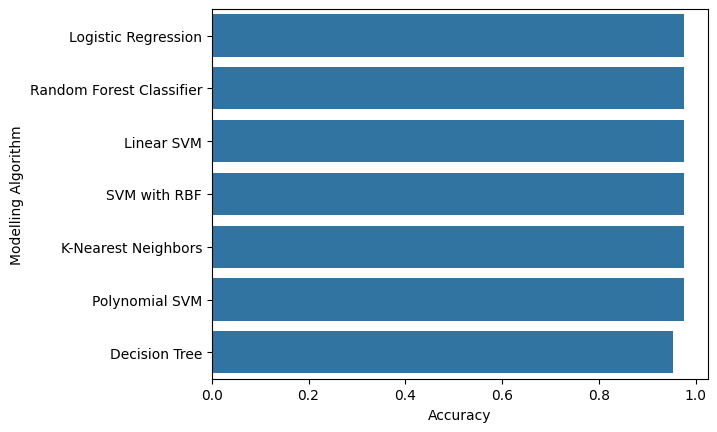

In [ ]:
# Compare the accuracy in the bar chart
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_table)

Logistics Regression has the highest accuracy. However, Accuracy might not always be the most appropriate metric, especially if the dataset is imbalanced. I'll also consider other metrics.

### *3.7.3. Confusion matrix on training data*

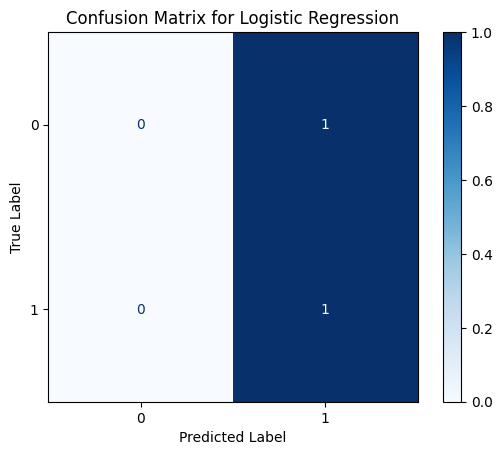

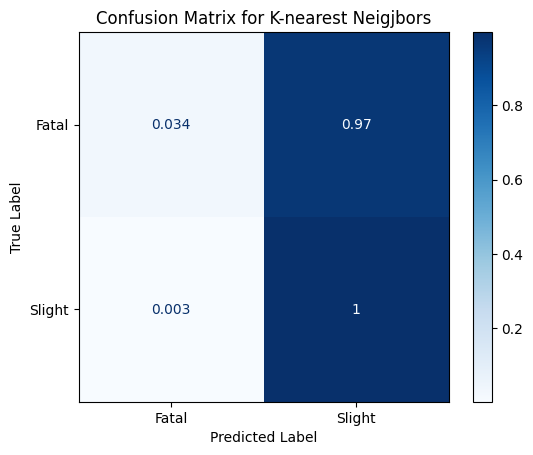

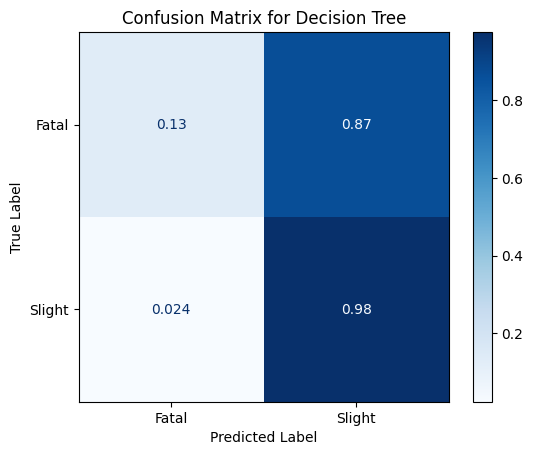

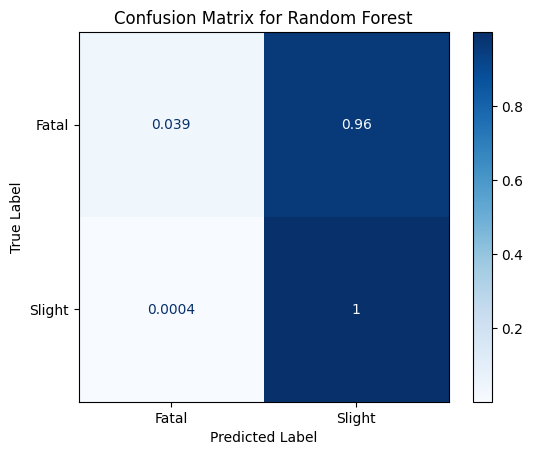

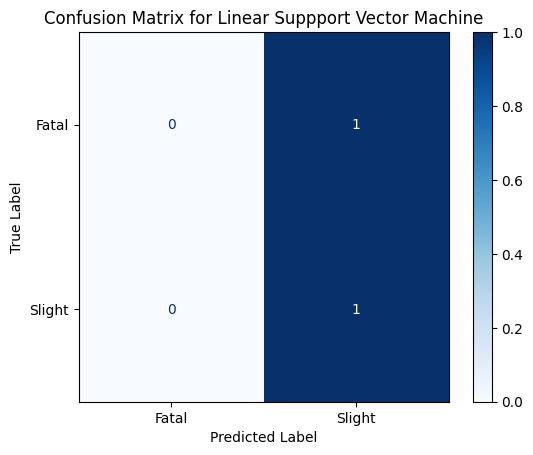

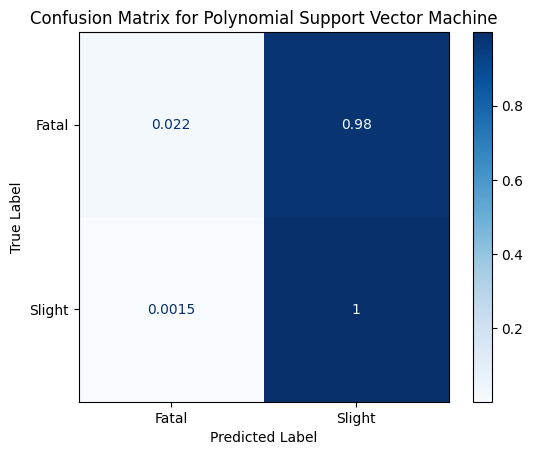

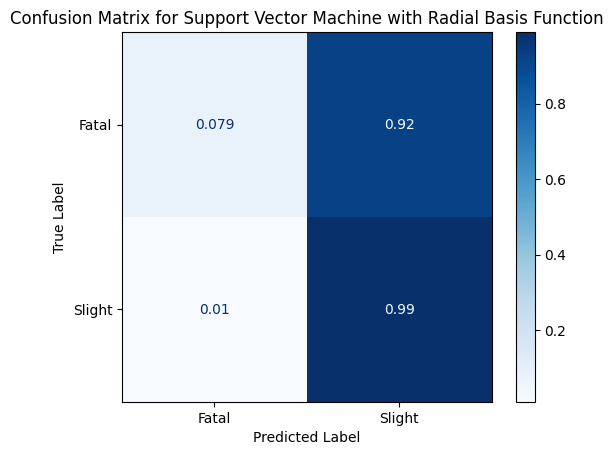

In [ ]:
# Import the normalize function from the preprocessing module
from sklearn.preprocessing import normalize

# Define models
models = {
    "Logistic Regression": best_lr_model,
    "K-nearest Neigjbors": best_knn_model,
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "Linear Suppport Vector Machine": best_lsvm,
    "Polynomial Support Vector Machine": best_svm_poly,
    "Support Vector Machine with Radial Basis Function" :best_svm_rbf
}

# Iterate over models
for name, model in models.items():
    # Perform cross-validation predictions on the training data
    yhat = cross_val_predict(model, Xtrain, ytrain, cv=5)

    # Calculate the confusion matrix
    cm = confusion_matrix(ytrain, yhat)

    # Normalize the confusion matrix
    cm_normalized = normalize(cm, axis=1, norm='l1')

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues) # Plot the confusion matrix using Blues colormap
    plt.title(f"Confusion Matrix for {name}") # Title of the confusion matrix

    # Labels of the plot
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    # Show the plot
    plt.show()


*   **Decision Tree** and **Support Vector Machine with RBF** indicate less severe  issue of class imbalance compared to other models, which assigned almost and exactly 100% of all training instances to the "Slight" class, regardless of the true class (either "Slight" or "Fatal").

*   Decision Tree model assigned 87% of all train instances 'Fatal' Class to 'Slight' class, while it is 92% of SVM with RBF model, which are lower than other models.



### *3.7.4. F-score of each best model against the baseline*

In [ ]:
# Create a list of lists containing the F-scores of the models
data = [
    ['Baseline (Dummy Classifier)', f_baseline],
    ['Logistic Regression', lr_grid_search.best_score_],
    ['K-nearest neighbor', knn_grid_search.best_score_],
    ['Decision Tree', dt_grid_search.best_score_],
    ['Random Forest', rf_random_search.best_score_],
    ['Linear Support Vector Machine', lsvm_bayes_search.best_score_],
    ['Polynomial Support Vector Machine', svm_poly_grid_search.best_score_],
    ['Support Vector Machine with RBF', svm_rbf_grid_search.best_score_]
]

# Sort the data based on F-score in descending order
data_sorted = sorted(data, key=lambda x: x[1], reverse=True)

# Define the headers for the table
headers = ['Model', 'F-score']

# Print the comparison table using the tabulate function
print(tabulate(data_sorted, headers=headers, tablefmt='grid'))

+-----------------------------------+-----------+
| Model                             |   F-score |
+===================================+===========+
| Decision Tree                     |  0.549103 |
+-----------------------------------+-----------+
| Support Vector Machine with RBF   |  0.544398 |
+-----------------------------------+-----------+
| Random Forest                     |  0.530692 |
+-----------------------------------+-----------+
| K-nearest neighbor                |  0.522848 |
+-----------------------------------+-----------+
| Polynomial Support Vector Machine |  0.51424  |
+-----------------------------------+-----------+
| Baseline (Dummy Classifier)       |  0.494075 |
+-----------------------------------+-----------+
| Logistic Regression               |  0.494075 |
+-----------------------------------+-----------+
| Linear Support Vector Machine     |  0.494075 |
+-----------------------------------+-----------+


The two best models based on F-score of best models are the Decision Tree and the Support Vector Machine with RBF kernel.

I choose **Decision Tree** and **Support Vector Machine with RBF models**.

## ***3.8. Analyse predictor importance of two best models on unbalanced data***

### *3.8.1. Gini importances*
This concept is specifically associated with decision tree-based models.

In [ ]:
# For Decision Tree
# Put them into a separate variable for convenience
dt_feature_importances = best_dt.feature_importances_

for k, v in sorted(zip(dt_feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k:.3f}")

longitude: 0.249
latitude: 0.158
engine_power: 0.146
age_of_casualty: 0.112
age_of_driver: 0.108
speed_limit: 0.044
vehicle_manoeuvre_group_Other: 0.025
casualty_class_Pedestrian: 0.018
skidding_and_overturning_Skidded: 0.016
skidding_and_overturning_None: 0.015
casualty_class_Passenger: 0.015
sex_of_casualty_Male: 0.014
vehicle_manoeuvre_group_Overtaking: 0.013
urban_or_rural_area_Urban: 0.012
vehicle_manoeuvre_group_Going ahead right-hand bend: 0.010
sex_of_driver_Male: 0.010
road_type_One way street: 0.007
driver_home_area_type_Urban area: 0.007
skidding_and_overturning_Overturned: 0.005
driver_experience_Senior: 0.004
driver_home_area_type_Small town: 0.004
vehicle_manoeuvre_group_Turning right: 0.003
road_type_Roundabout: 0.003
vehicle_manoeuvre_group_Turning left: 0.001
vehicle_manoeuvre_group_Moving off: 0.001
vehicle_manoeuvre_group_U-turn: 0.000
vehicle_manoeuvre_group_Slowing or stopping: 0.000
vehicle_manoeuvre_group_Reversing: 0.000
road_type_Slip road: 0.000


### *3.8.2. Permutation importances*

In [ ]:
# For Decision tree

# Import the permutation_importance function
from sklearn.inspection import permutation_importance

# Compute permutation importance scores for the best Decision Tree model
dt_result = permutation_importance(best_dt, Xtrain, ytrain,
                                n_repeats=10, random_state=7,
                                scoring='f1_macro')

In [ ]:
# Raw permutation importance scores
sorted_importances_idx = dt_result.importances_mean.argsort()

# Create a DataFrame to store raw permutation importance scores
raw_importances = pd.DataFrame(
    dt_result.importances[sorted_importances_idx].T,
    columns=Xtrain.columns[sorted_importances_idx]
)

# Show the dataframe
raw_importances

,vehicle_manoeuvre_group_U-turn,vehicle_manoeuvre_group_Turning right,vehicle_manoeuvre_group_Slowing or stopping,vehicle_manoeuvre_group_Reversing,road_type_Slip road,vehicle_manoeuvre_group_Moving off,road_type_Roundabout,road_type_One way street,driver_experience_Senior,vehicle_manoeuvre_group_Turning left,...,casualty_class_Passenger,skidding_and_overturning_None,casualty_class_Pedestrian,sex_of_casualty_Male,age_of_driver,engine_power,age_of_casualty,speed_limit,longitude,latitude
0,0.0,0.0,0.0,0.0,0.0,0.001567,0.002734,0.002734,0.001169,0.003141,...,0.039113,0.058395,0.066280,0.091704,0.112329,0.134006,0.179997,0.267717,0.286894,0.299452
1,0.0,0.0,0.0,0.0,0.0,0.000393,-0.001175,0.002734,0.005051,0.007049,...,0.043400,0.055092,0.054109,0.086107,0.133911,0.136671,0.177718,0.256098,0.283551,0.306941
2,0.0,0.0,0.0,0.0,0.0,0.001567,0.002734,0.001567,0.001169,0.004308,...,0.033893,0.044430,0.068595,0.086773,0.123481,0.143683,0.179310,0.261628,0.282685,0.310714
3,0.0,0.0,0.0,0.0,0.0,0.001567,0.002734,0.001567,0.001567,0.003141,...,0.031698,0.045454,0.067210,0.091769,0.123822,0.142974,0.185343,0.273964,0.286904,0.308492
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.003488,0.001567,0.005051,0.007771,...,0.042365,0.050757,0.067899,0.078866,0.117259,0.139635,0.170794,0.263074,0.286330,0.297327
5,0.0,0.0,0.0,0.0,0.0,0.000393,0.000393,0.001567,0.004639,0.003141,...,0.030611,0.048498,0.062789,0.091571,0.119407,0.142607,0.174543,0.264189,0.286016,0.296604
6,0.0,0.0,0.0,0.0,0.0,0.001567,0.001169,0.003896,0.003896,0.003896,...,0.033289,0.060976,0.064823,0.087261,0.127849,0.146560,0.173125,0.239547,0.284495,0.295207
7,0.0,0.0,0.0,0.0,0.0,0.001567,0.002734,0.001567,0.002734,0.003141,...,0.027376,0.063460,0.058978,0.084895,0.133021,0.132005,0.183921,0.275723,0.281958,0.304294
8,0.0,0.0,0.0,0.0,0.0,0.001567,0.001567,0.001567,0.002734,0.003141,...,0.034908,0.053346,0.057378,0.087359,0.127474,0.144122,0.164534,0.261922,0.293087,0.305172
9,0.0,0.0,0.0,0.0,0.0,0.002734,0.002331,0.001567,0.001567,0.005468,...,0.027932,0.053761,0.068595,0.097636,0.130004,0.136949,0.149231,0.267717,0.273203,0.297432


In [ ]:
# The importance scores are sorted in descending order
pd.set_option('display.max_rows', None)
pd.Series(dt_result.importances_mean, index=Xtest.columns).sort_values(ascending=False)

latitude                                               0.302164
longitude                                              0.284512
speed_limit                                            0.263158
age_of_casualty                                        0.173852
engine_power                                           0.139921
age_of_driver                                          0.124856
sex_of_casualty_Male                                   0.088394
casualty_class_Pedestrian                              0.063666
skidding_and_overturning_None                          0.053417
casualty_class_Passenger                               0.034459
vehicle_manoeuvre_group_Other                          0.028008
vehicle_manoeuvre_group_Going ahead right-hand bend    0.023423
urban_or_rural_area_Urban                              0.018106
sex_of_driver_Male                                     0.017135
skidding_and_overturning_Skidded                       0.012996
driver_home_area_type_Small town        

In [ ]:
# For Support Vector Machine with Radial Basis Function kernel

# Compute permutation importance scores for the best Support Vector Machine with Radial Basis Function model
svm_rbf_result = permutation_importance(best_svm_rbf, Xtrain, ytrain,
                                n_repeats=10, random_state=7,
                                scoring='f1_macro')

In [ ]:
# Raw permutation importance scores
sorted_importances_idx = svm_rbf_result.importances_mean.argsort()

# Create a DataFrame to store raw permutation importance scores
svm_rbf_raw_importances = pd.DataFrame(
    svm_rbf_result.importances[sorted_importances_idx].T,
    columns=Xtrain.columns[sorted_importances_idx]
)

# Show the dataframe
svm_rbf_raw_importances

,vehicle_manoeuvre_group_U-turn,road_type_Slip road,vehicle_manoeuvre_group_Reversing,road_type_One way street,vehicle_manoeuvre_group_Turning left,road_type_Roundabout,vehicle_manoeuvre_group_Moving off,vehicle_manoeuvre_group_Slowing or stopping,vehicle_manoeuvre_group_Overtaking,skidding_and_overturning_Overturned,...,sex_of_driver_Male,sex_of_casualty_Male,driver_home_area_type_Urban area,latitude,casualty_class_Passenger,driver_experience_Senior,skidding_and_overturning_None,longitude,age_of_casualty,speed_limit
0,0.003730,0.004879,0.005020,0.008636,0.014920,0.009917,0.011264,0.028751,0.035312,0.022476,...,0.057966,0.061389,0.076746,0.071920,0.075025,0.067703,0.080724,0.088981,0.091479,0.099760
1,0.003730,0.002430,0.002598,0.013613,0.012454,0.018657,0.019907,0.028751,0.027524,0.025044,...,0.072382,0.054445,0.063308,0.085239,0.077558,0.077956,0.079595,0.101781,0.107334,0.093250
2,0.001304,0.002430,0.007460,0.016129,0.013613,0.012393,0.030101,0.033913,0.023726,0.025044,...,0.053686,0.089302,0.062694,0.069259,0.074600,0.067677,0.079975,0.077687,0.095316,0.104440
3,0.003730,0.002430,0.005020,0.011115,0.006174,0.025044,0.017404,0.021148,0.021182,0.028870,...,0.047541,0.074600,0.068224,0.067675,0.081398,0.079497,0.075209,0.078066,0.101532,0.109153
4,0.001304,0.012331,0.002598,0.014886,0.013708,0.013613,0.021148,0.018650,0.032697,0.027631,...,0.059441,0.050397,0.064931,0.061389,0.082758,0.087546,0.081844,0.081378,0.105398,0.119804
5,0.003730,0.008636,0.009917,0.008636,0.011115,0.023726,0.019907,0.026198,0.025044,0.027631,...,0.061389,0.055546,0.059026,0.076495,0.090300,0.092202,0.070658,0.089734,0.119578,0.100655
6,0.008636,0.002430,0.014886,0.009829,0.009917,0.018657,0.012454,0.024966,0.023664,0.025044,...,0.049620,0.068785,0.061076,0.054839,0.068203,0.056403,0.074757,0.071814,0.093086,0.101653
7,0.003730,0.000000,0.007460,0.018664,0.016129,0.012393,0.011190,0.011264,0.019907,0.027631,...,0.053686,0.051856,0.060599,0.071446,0.078987,0.084802,0.074757,0.081733,0.093919,0.132617
8,0.001304,0.002430,0.005020,0.006174,0.013661,0.014886,0.014954,0.018650,0.028635,0.030237,...,0.050060,0.055546,0.059481,0.094770,0.076495,0.061841,0.082623,0.087285,0.098722,0.112123
9,0.003730,0.004879,0.007460,0.008636,0.007574,0.016150,0.021148,0.019907,0.026289,0.027631,...,0.058149,0.057053,0.055655,0.069877,0.064411,0.098493,0.078856,0.087776,0.095769,0.108282


In [ ]:
# The importance scores are sorted in descending order
pd.set_option('display.max_rows', None)
pd.Series(svm_rbf_result.importances_mean, index=Xtest.columns).sort_values(ascending=False)

speed_limit                                            0.108174
age_of_casualty                                        0.100213
longitude                                              0.084624
skidding_and_overturning_None                          0.077900
driver_experience_Senior                               0.077412
casualty_class_Passenger                               0.076974
latitude                                               0.072291
driver_home_area_type_Urban area                       0.063174
sex_of_casualty_Male                                   0.061892
sex_of_driver_Male                                     0.056392
engine_power                                           0.056152
driver_home_area_type_Small town                       0.055245
age_of_driver                                          0.052745
casualty_class_Pedestrian                              0.051587
skidding_and_overturning_Skidded                       0.051518
urban_or_rural_area_Urban               

*   For Decision Tree, **'latitude', 'longitude', 'age_of_driver','age_of_casualty', 'speed_limit' and 'engine_power'** are regarded as highly important in predicting accident severity. Understanding the complex risk profiles associated with different demographics, vehicle characteristics, and geographical regions empowers insurance companies to customise insurance products and risk mitigation strategies. This allows for identifying high-risk areas and understanding vulnerability and potential impact of the vehicles involved in accidents.
*   Similarly, for SVM with 'RBF' kernel, **'age_of_casualty',  'skidding_and_overturning_None', 'speed_limit' and 'longitude'** are regarded as highly important. The significance of vehicle and casualty information  highlights the importance of developing targeted safety programs and specialized insurance coverage.                                     



## **3.9. Random oversampling**

In [ ]:
# Start a timer
ros_start = time.time()

# Define the pipeline with random oversampling and RandomForest classifier
pipeline = Pipeline([
    ('ros', RandomOverSampler(random_state=7)),
    ('rfc', RandomForestClassifier(random_state=7))
])

# Define the hyperparameter grid
ros_param_grid = [{
    'ros__sampling_strategy': [0.5, 0.75, 1.0],
    'rfc__n_estimators': [100, 200, 500],
    'rfc__max_depth': [5, None]
},]

# Instantiate the GridSearchCV object to find the best hyperparameters for Random Oversampling
# Use 5-fold cross-validation
ros_grid_search = GridSearchCV(pipeline, ros_param_grid, cv=5,
                               scoring='f1_macro',
                               return_train_score=True)

# Fit the GridSearchCV object to the training data
ros_grid_search.fit(Xtrain, ytrain)

# Calculate how much it took to tune hyperparameters and train the model
ros_duration = timedelta(seconds=time.time() - ros_start)

# Print the execution time
print("Execution time HH:MM:SS:",ros_duration)

Execution time HH:MM:SS: 0:03:44.278380


In [ ]:
# Print F1 Score of the best model of Random Oversampling
print("Best F1 Score of Random Oversampling:", ros_grid_search.best_score_)

Best F1 Score of Random Oversampling: 0.5525204871157493


In [ ]:
# Print cross-validation results for the Random Oversampling
print_cv_results(ros_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
0,"{'rfc__max_depth': 5, 'rfc__n_estimators': 100, 'ros__sampling_strategy': 0.5}",0.599565,0.552520,7.846432
3,"{'rfc__max_depth': 5, 'rfc__n_estimators': 200, 'ros__sampling_strategy': 0.5}",0.601457,0.552051,8.214361
6,"{'rfc__max_depth': 5, 'rfc__n_estimators': 500, 'ros__sampling_strategy': 0.5}",0.603665,0.551819,8.588507
12,"{'rfc__max_depth': None, 'rfc__n_estimators': 200, 'ros__sampling_strategy': 0.5}",1.000000,0.530581,46.941885
9,"{'rfc__max_depth': None, 'rfc__n_estimators': 100, 'ros__sampling_strategy': 0.5}",1.000000,0.530581,46.941885
...,...,...,...,...
1,"{'rfc__max_depth': 5, 'rfc__n_estimators': 100, 'ros__sampling_strategy': 0.75}",0.553394,0.523774,5.352488
7,"{'rfc__max_depth': 5, 'rfc__n_estimators': 500, 'ros__sampling_strategy': 0.75}",0.557618,0.523705,6.081742
2,"{'rfc__max_depth': 5, 'rfc__n_estimators': 100, 'ros__sampling_strategy': 1.0}",0.529517,0.509016,3.871665
8,"{'rfc__max_depth': 5, 'rfc__n_estimators': 500, 'ros__sampling_strategy': 1.0}",0.528574,0.508355,3.825106


There are configurations which exhibit low difference between mean train score and mean test score. However, some achieve perfect mean train scores (1.0), indicating potential overfitting to the training data.


In [ ]:
# Save the model
dump(ros_grid_search.best_estimator_, 'models/ros-clf.joblib')

['models/ros-clf.joblib']

## **3.10. SMOTE**


In [ ]:
# Start a timer
os_start = time.time()

# Define the pipeline with SMOTE and RandomForest classifier
pipeline = Pipeline([
        ('smote', SMOTE(random_state=7)),
        ('rfc', RandomForestClassifier(random_state=7))
    ])

# Define the hyperparameter grid
os_param_grid = [
    {'smote__sampling_strategy': [0.5, 0.75, 1.0],
        'rfc__n_estimators': [100, 200, 500],
        'rfc__max_depth': [5, None]
    },
]

# Instantiate the GridSearchCV object to find the best hyperparameters for SMOTE
# Use 5-fold cross-validation
os_grid_search = GridSearchCV(pipeline, os_param_grid, cv=5,
                              scoring='f1_macro',
                              return_train_score=True)

# Fit the GridSearchCV object to the training data
os_grid_search.fit(Xtrain, ytrain)

# Calculate how much it took to tune hyperparameters and train the model
os_duration = timedelta(seconds=time.time() - os_start)

# Print the execution time
print("Execution time HH:MM:SS:",os_duration)

Execution time HH:MM:SS: 0:05:21.493250


In [ ]:
# Print F1 Score of the best model of SMOTE
print("Best F1 Score of SMOTE:", os_grid_search.best_score_)

Best F1 Score of SMOTE: 0.5649564836388782


In [ ]:
# Print cross-validation results for the SMOTE
print_cv_results(os_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
6,"{'rfc__max_depth': 5, 'rfc__n_estimators': 500, 'smote__sampling_strategy': 0.5}",0.591602,0.564956,4.503971
3,"{'rfc__max_depth': 5, 'rfc__n_estimators': 200, 'smote__sampling_strategy': 0.5}",0.588851,0.564666,4.107163
0,"{'rfc__max_depth': 5, 'rfc__n_estimators': 100, 'smote__sampling_strategy': 0.5}",0.589030,0.562736,4.463944
11,"{'rfc__max_depth': None, 'rfc__n_estimators': 100, 'smote__sampling_strategy': 1.0}",1.000000,0.552001,44.799908
7,"{'rfc__max_depth': 5, 'rfc__n_estimators': 500, 'smote__sampling_strategy': 0.75}",0.564287,0.540762,4.168867
...,...,...,...,...
9,"{'rfc__max_depth': None, 'rfc__n_estimators': 100, 'smote__sampling_strategy': 0.5}",1.000000,0.533942,46.605797
12,"{'rfc__max_depth': None, 'rfc__n_estimators': 200, 'smote__sampling_strategy': 0.5}",1.000000,0.533624,46.637634
5,"{'rfc__max_depth': 5, 'rfc__n_estimators': 200, 'smote__sampling_strategy': 1.0}",0.547297,0.532759,2.656277
2,"{'rfc__max_depth': 5, 'rfc__n_estimators': 100, 'smote__sampling_strategy': 1.0}",0.547691,0.532209,2.826721


Typically, the mean train scores are higher. The model indicates a certain level of overfitting.

In [ ]:
# Save the model
dump(os_grid_search.best_estimator_, 'models/os-clf.joblib')

['models/os-clf.joblib']

## **3.11. Random undersampling**



In [ ]:
# Start a timer
rus_start = time.time()

# Define the pipeline with Random Undersampling and RandomForest classifier
pipeline = Pipeline([
        ('rus', RandomUnderSampler(random_state=7)),
        ('rfc', RandomForestClassifier(random_state=7))
    ])

# Define the hyperparameter grid
rus_param_grid = [
    {
        'rus__sampling_strategy': [0.5, 0.75, 1.0],
        'rfc__n_estimators': [100, 200, 500],
        'rfc__max_depth': [5, None]
    },
]

# Instantiate the GridSearchCV object to find the best hyperparameters for Random Undersampling
# Use 5-fold cross-validation
rus_grid_search = GridSearchCV(pipeline, rus_param_grid, cv=5,
                              scoring='f1_macro',
                              return_train_score=True)

# Fit the GridSearchCV object to the training data
rus_grid_search.fit(Xtrain, ytrain)

# Calculate how much it took to tune hyperparameters and train the model
rus_duration = timedelta(seconds=time.time() - rus_start)

# Print the execution time
print("Execution time HH:MM:SS:",rus_duration)

Execution time HH:MM:SS: 0:01:10.964837


In [ ]:
# Print F1 Score of the best model of Random Undersampling
print("Best F1 Score of Random Undersampling:", rus_grid_search.best_score_)

Best F1 Score of Random Undersampling: 0.5409861633655593


In [ ]:
# Print cross-validation results for the Random Undersampling
print_cv_results(rus_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
6,"{'rfc__max_depth': 5, 'rfc__n_estimators': 500, 'rus__sampling_strategy': 0.5}",0.561412,0.540986,3.638255
15,"{'rfc__max_depth': None, 'rfc__n_estimators': 500, 'rus__sampling_strategy': 0.5}",0.596486,0.537173,9.943705
3,"{'rfc__max_depth': 5, 'rfc__n_estimators': 200, 'rus__sampling_strategy': 0.5}",0.558488,0.536829,3.878078
0,"{'rfc__max_depth': 5, 'rfc__n_estimators': 100, 'rus__sampling_strategy': 0.5}",0.556041,0.534857,3.809866
12,"{'rfc__max_depth': None, 'rfc__n_estimators': 200, 'rus__sampling_strategy': 0.5}",0.592904,0.533079,10.090236
...,...,...,...,...
5,"{'rfc__max_depth': 5, 'rfc__n_estimators': 200, 'rus__sampling_strategy': 1.0}",0.493427,0.482875,2.138596
8,"{'rfc__max_depth': 5, 'rfc__n_estimators': 500, 'rus__sampling_strategy': 1.0}",0.494217,0.482481,2.374694
17,"{'rfc__max_depth': None, 'rfc__n_estimators': 500, 'rus__sampling_strategy': 1.0}",0.500447,0.479342,4.217318
14,"{'rfc__max_depth': None, 'rfc__n_estimators': 200, 'rus__sampling_strategy': 1.0}",0.498817,0.476836,4.406618


The mean train score is generally higher than the mean test score. While Random Undersampling may show some promise in improving model , other evaluation metrics should be taken into consideration.

In [ ]:
# Save the model
dump(rus_grid_search.best_estimator_, 'models/rus-clf.joblib')

['models/rus-clf.joblib']

## **3.12. Undersampling with Cluster Centroids**

In [ ]:
# Start a timer
us_start = time.time()

# Define the pipeline with ClusterCentroids and RandomForest classifier
pipeline = Pipeline([
    ('cc', ClusterCentroids(random_state=7)),
    ('rfc', RandomForestClassifier(random_state=7))
])

# Define the hyperparameter grid
param_grid = [
    {
        'cc__sampling_strategy': [0.5, 0.75, 1.0],
        'rfc__n_estimators': [100, 200, 500],
        'rfc__max_depth': [5, None]
    },
]


"""Instantiate the GridSearchCV object to find the best hyperparameters for
Undersampling with Cluster Centroids. Use 5-fold cross-validation"""
us_grid_search = GridSearchCV(pipeline, param_grid, cv=10,
                              scoring='f1_macro',
                              return_train_score=True)

# Fit the GridSearchCV object to the training data
us_grid_search.fit(Xtrain, ytrain)

# Calculate how much it took to tune hyperparameters and train the model
us_duration = timedelta(seconds=time.time() - us_start)

# Print the execution time
print("Execution time HH:MM:SS:",us_duration)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Execution time HH:MM:SS: 0:16:05.858275


In [ ]:
# Print F1 Score of the best model of Undersampling with Cluster Centroids
print("Best F1 Score of Undersampling with Cluster Centroids:", us_grid_search.best_score_)

Best F1 Score of Undersampling with Cluster Centroids: 0.4041008338179516


In [ ]:
# Print cross-validation results for Undersampling with Cluster Centroids
print_cv_results(us_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
1,"{'cc__sampling_strategy': 0.5, 'rfc__max_depth': 5, 'rfc__n_estimators': 200}",0.412076,0.404101,1.935424
2,"{'cc__sampling_strategy': 0.5, 'rfc__max_depth': 5, 'rfc__n_estimators': 500}",0.409534,0.401367,1.994011
0,"{'cc__sampling_strategy': 0.5, 'rfc__max_depth': 5, 'rfc__n_estimators': 100}",0.410523,0.400705,2.391575
5,"{'cc__sampling_strategy': 0.5, 'rfc__max_depth': None, 'rfc__n_estimators': 500}",0.336474,0.329001,2.221010
4,"{'cc__sampling_strategy': 0.5, 'rfc__max_depth': None, 'rfc__n_estimators': 200}",0.336479,0.328141,2.478242
...,...,...,...,...
13,"{'cc__sampling_strategy': 1.0, 'rfc__max_depth': 5, 'rfc__n_estimators': 200}",0.099367,0.098276,1.098251
14,"{'cc__sampling_strategy': 1.0, 'rfc__max_depth': 5, 'rfc__n_estimators': 500}",0.099977,0.098063,1.914253
16,"{'cc__sampling_strategy': 1.0, 'rfc__max_depth': None, 'rfc__n_estimators': 200}",0.085654,0.083872,2.080469
15,"{'cc__sampling_strategy': 1.0, 'rfc__max_depth': None, 'rfc__n_estimators': 100}",0.085744,0.083552,2.556784


Some combinations of parameters show quite similar mean train scores and mean test scores.

In [ ]:
# Save the model
dump(us_grid_search.best_estimator_, 'models/us-clf.joblib')

['models/us-clf.joblib']

## **3.13. Compare resampling models with models on unbalanced data**

### *3.13.1. The execution time*

In [ ]:
# List of tuples containing the names of classifiers along with their respective durations
durations1 = [
    ("Decision Trees", dt_duration),
    ("Support Vector Machine with Radial Basis Function", svm_rbf_duration),
     ("Random oversampling", ros_duration),
    ("SMOTE", os_duration),
    ("Random undersampling", rus_duration),
    ("Undersampling with Cluster Centroids", us_duration),
]

# Sort the durations by the second item in each tuple (the duration)
sorted_durations1 = sorted(durations1, key=lambda x: x[1])

# Print the sorted durations
for model, duration in sorted_durations1:
    print(f'{model}: {duration}')

Support Vector Machine with Radial Basis Function: 0:00:31.350698
Decision Trees: 0:00:34.660397
Random undersampling: 0:01:10.964837
Random oversampling: 0:03:44.278380
SMOTE: 0:05:21.493250
Undersampling with Cluster Centroids: 0:16:05.858275


Decision Trees and Support Vector Machine with RBF have the fastest execution times, while Undersampling with Cluster Centroids is the slowest.

### *3.13.2. Confusion matrix on training data*

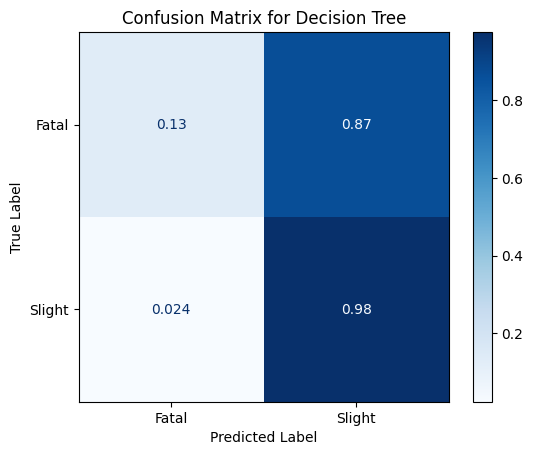

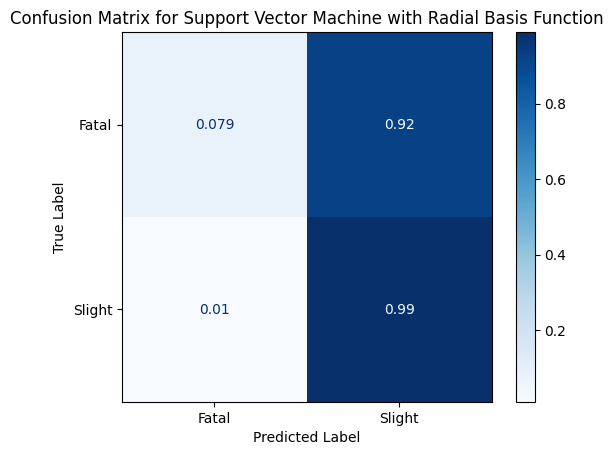

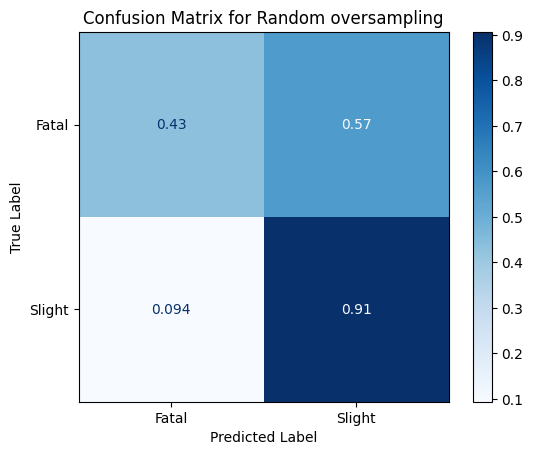

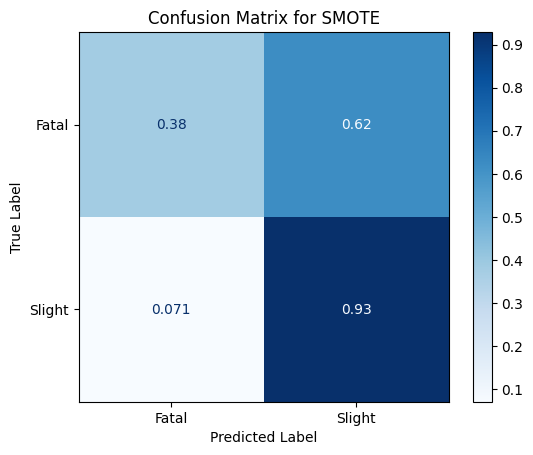

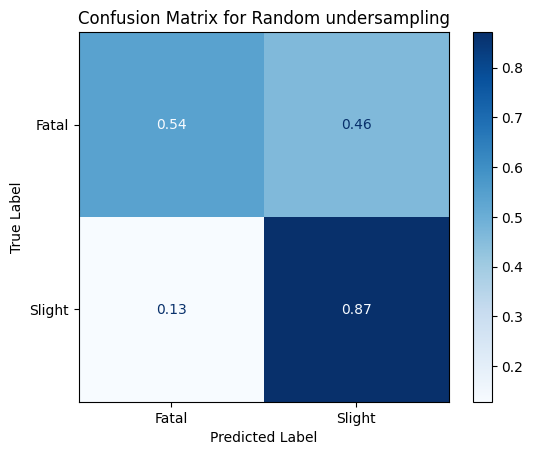

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

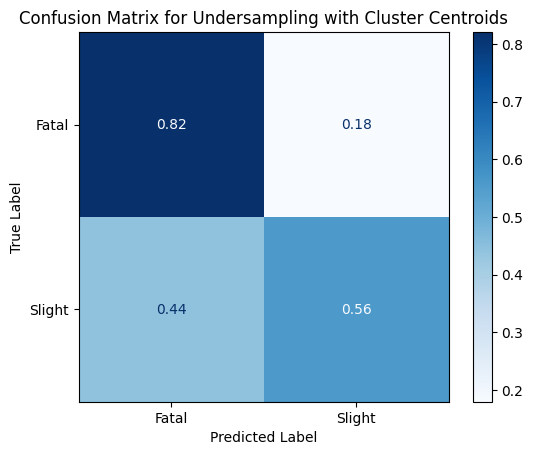

In [ ]:
# Define models
models1 = {
    "Decision Tree": best_dt,
    "Support Vector Machine with Radial Basis Function" :best_svm_rbf,
    "Random oversampling": ros_grid_search.best_estimator_,
    "SMOTE": os_grid_search.best_estimator_,
    "Random undersampling": rus_grid_search.best_estimator_,
    "Undersampling with Cluster Centroids": us_grid_search.best_estimator_
}

# Iterate over models
for name, model in models1.items():
    # Perform cross-validation predictions on the training data
    yhat = cross_val_predict(model, Xtrain, ytrain, cv=5)

    # Calculate the confusion matrix
    cm = confusion_matrix(ytrain, yhat)

    # Normalize the confusion matrix
    cm_normalized = normalize(cm, axis=1, norm='l1')

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues) # Plot the confusion matrix using Blues colormap
    plt.title(f"Confusion Matrix for {name}") # Title of the confusion matrix

    # Labels of the plot
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    # Show the plot
    plt.show()

*   **Random oversampling** shows an improvement on the classifier trained on unbalanced data. 43% of the minority class (Fatal) instances are correctly classified, opposed to just 13% with Decision Tree and 7.9% with the SVM (kernel=rbf).

*   Although **SMOTE** still has a tendency to classify most train instances as "Slight", its ratio is smaller than before: 62% of "Fatal" instances were classified as "Slight". This is a reduction compared to 87% (DT) and 92% (SVM with RBF) of the classifier trained on unbalanced data.


*   For **Random Undersampling**, the classifier mis-classifies the 'Fatal' instances, although to a significantly smaller extent compared to the classifier trained on the unbalanced data.

*   82% of the 'Fatal' instances are correctly classified in **Undersampling with Cluster Centroids**, which suggests this method is effective in correctly identifying instances of the minority class.





For over- and undersampling techniques, there is a significant reduction in misclassifications of the minority class, but this comes at the cost of an increase in errors when identifying instances of the majority class.

### *3.13.3. F-score of each best model against the baseline*

In [ ]:
# Create a list of lists containing the F-scores of the models
data1 = [
     ['Baseline (Dummy Classifier)', f_baseline],
    ['Decision Tree', dt_grid_search.best_score_],
    ['Support Vector Machine with RBF', svm_rbf_grid_search.best_score_],
    ['Random oversampling', ros_grid_search.best_score_],
    ['SMOTE', os_grid_search.best_score_],
    ["Random undersampling", rus_grid_search.best_score_],
    ["Undersampling with Cluster Centroids", us_grid_search.best_score_]
]

# Sort the data based on F-score in descending order
data_sorted1 = sorted(data1, key=lambda x: x[1], reverse=True)

# Define the headers for the table
headers = ['Model', 'F-score']

# Print the comparison table using the tabulate function
print(tabulate(data_sorted1, headers=headers, tablefmt='grid'))

+--------------------------------------+-----------+
| Model                                |   F-score |
+======================================+===========+
| SMOTE                                |  0.564956 |
+--------------------------------------+-----------+
| Random oversampling                  |  0.55252  |
+--------------------------------------+-----------+
| Decision Tree                        |  0.549103 |
+--------------------------------------+-----------+
| Support Vector Machine with RBF      |  0.544398 |
+--------------------------------------+-----------+
| Random undersampling                 |  0.540986 |
+--------------------------------------+-----------+
| Baseline (Dummy Classifier)          |  0.494075 |
+--------------------------------------+-----------+
| Undersampling with Cluster Centroids |  0.404101 |
+--------------------------------------+-----------+


Random oversampling and SMOTE, along with the decision tree model show better performance on the training data. Conversely,  undersampling techniques and the SVM with RBF model demonstrated inferior ability to capture the underlying patterns in the imbalanced data. On the train data, Undersampling with Cluster Centroids perform even worse than the baseline. I'll not evaluate this model on test set.

# **4. Model Evaluation**

I'll compare the performance of the original Decision Tree and Support Vector Machine with RBF models to those created using over- and under-sampling on the test data:

In [ ]:
# Import the load function from the joblib library
from joblib import load

# Load trained models from their respective files
best_dt = load("models/dt-clf.joblib")
best_svm_rbf = load("models/svm-rbf-clf.joblib")
best_ros =  load('models/ros-clf.joblib')
best_os =  load('models/os-clf.joblib')
best_rus =  load('models/rus-clf.joblib')
best_us =  load('models/us-clf.joblib')

## ***4.1. Decision Tree***

In [ ]:
# Make predictions on test set
dt_yhat = best_dt.predict(Xtest)

# Calculate precision, recall, and F1-score
dt_test_p, dt_test_r, dt_test_f, _ = precision_recall_fscore_support(ytest,
                                                                     dt_yhat,
                                                                     average="macro", zero_division=0.0)

# Access F1-score
print("F1-score on test set (Decision Tree):",  dt_test_f)

F1-score on test set (Decision Tree): 0.5445990211568846


In [ ]:
"""Create a list of lists containing the data to compare F-score of baseline,
decision tree on training and testing data"""
dt_data = [
    ['Baseline (Dummy Classifier)', f_baseline],
    ['Decision Tree (Train)', dt_grid_search.best_score_],
     ['Decision Tree (Test)', dt_test_f]
]

# Sort the data based on F-score in descending order
dt_data_sorted = sorted(dt_data, key=lambda x: x[1], reverse=True)

# Define the headers for the table
headers = ['Model', 'F-score']

# Print the comparison table using the tabulate function
print(tabulate(dt_data_sorted, headers=headers, tablefmt='grid'))

+-----------------------------+-----------+
| Model                       |   F-score |
+=============================+===========+
| Decision Tree (Train)       |  0.549103 |
+-----------------------------+-----------+
| Decision Tree (Test)        |  0.544599 |
+-----------------------------+-----------+
| Baseline (Dummy Classifier) |  0.494075 |
+-----------------------------+-----------+


Higher training F-score indicates that it does not generalize well to unseen data. The DT model outperforms baseline model.

## ***4.2. SVM with RBF***

In [ ]:
# Make predictions on test set
svm_rbf_yhat = best_svm_rbf.predict(Xtest)

# Calculate precision, recall, and F1-score
svm_rbf_test_p, svm_rbf_test_r, svm_rbf_test_f, _ = precision_recall_fscore_support(ytest,
                                                                                    svm_rbf_yhat,
                                                                                    average="macro",
                                                                                    zero_division=0.0)

# Access F1-score
print("F1-score on testset (Support Vector Machine with RBF):",  svm_rbf_test_f)

F1-score on testset (Support Vector Machine with RBF): 0.5176637311468772


In [ ]:
"""Create a list of lists containing the data to compare F-score of baseline,
support vector machine with 'RBF' kernel on training and testing data"""
svm_rbf_data = [
    ['Baseline (Dummy Classifier)', f_baseline],
    ["Support Vector Machine with 'RBF' kernel (Train)", svm_rbf_grid_search.best_score_],
    ["Support Vector Machine with 'RBF' kernel (Test)", svm_rbf_test_f]
]

# Sort the data based on F-score in descending order
svm_rbf_data_sorted = sorted(svm_rbf_data, key=lambda x: x[1], reverse=True)

# Define the headers for the table
headers = ['Model', 'F-score']

# Print the comparison table using the tabulate function
print(tabulate(svm_rbf_data_sorted, headers=headers, tablefmt='grid'))

+--------------------------------------------------+-----------+
| Model                                            |   F-score |
+==================================================+===========+
| Support Vector Machine with 'RBF' kernel (Train) |  0.544398 |
+--------------------------------------------------+-----------+
| Support Vector Machine with 'RBF' kernel (Test)  |  0.517664 |
+--------------------------------------------------+-----------+
| Baseline (Dummy Classifier)                      |  0.494075 |
+--------------------------------------------------+-----------+


F-scores on testing data is smaller than that on training data. The model does not perform well on unseen data. Decision Tree outperforms this model.


## ***4.3. Random oversampling***


In [ ]:
# Make predictions on test set
ros_yhat =  ros_grid_search.best_estimator_.predict(Xtest)

# Calculate precision, recall, and F1-score
ros_test_p, ros_test_r, ros_test_f, _ = precision_recall_fscore_support(ytest,
                                                                        ros_yhat,
                                                                        average="macro",
                                                                        zero_division=0.0)

# Access F1-score
print("F1-score on testset (Support Vector Machine with RBF):",  ros_test_f)

F1-score on testset (Support Vector Machine with RBF): 0.5901546451006512


In [ ]:
"""Create a list of lists containing the data to compare F-score of baseline,
Random Oversampling on training and testing data"""
ros_data = [
    ['Baseline (Dummy Classifier)', f_baseline],
    ["Random Oversampling (Train)", ros_grid_search.best_score_],
    ["Random Oversampling (Test)", ros_test_f]
]

# Sort the data based on F-score in descending order
ros_data_sorted = sorted(ros_data, key=lambda x: x[1], reverse=True)

# Define the headers for the table
headers = ['Model', 'F-score']

# Print the comparison table using the tabulate function
print(tabulate(ros_data_sorted, headers=headers, tablefmt='grid'))

+-----------------------------+-----------+
| Model                       |   F-score |
+=============================+===========+
| Random Oversampling (Test)  |  0.590155 |
+-----------------------------+-----------+
| Random Oversampling (Train) |  0.55252  |
+-----------------------------+-----------+
| Baseline (Dummy Classifier) |  0.494075 |
+-----------------------------+-----------+


F-score of Random Oversampling on test set is higher than that on train set of the model and F-score of Decision Tree on test set.

## ***4.4. SMOTE***


In [ ]:
# Make predictions on test set
os_yhat =  os_grid_search.best_estimator_.predict(Xtest)

# Calculate precision, recall, and F1-score
os_test_p, os_test_r, os_test_f, _ = precision_recall_fscore_support(ytest,
                                                                     os_yhat,
                                                                     average="macro",
                                                                     zero_division=0.0)

# Access F1-score
print("F1-score on testset (SMOTE):",  os_test_f)

F1-score on testset (SMOTE): 0.6103948727503613


In [ ]:
"""Create a list of lists containing the data to compare F-score of baseline,
SMOTE on training and testing data"""
os_data = [
    ['Baseline (Dummy Classifier)', f_baseline],
    ["SMOTE (Train)", os_grid_search.best_score_],
    ["SMOTE (Test)", os_test_f]
]

# Sort the data based on F-score in descending order
os_data_sorted = sorted(os_data, key=lambda x: x[1], reverse=True)

# Define the headers for the table
headers = ['Model', 'F-score']

# Print the comparison table using the tabulate function
print(tabulate(os_data_sorted, headers=headers, tablefmt='grid'))

+-----------------------------+-----------+
| Model                       |   F-score |
+=============================+===========+
| SMOTE (Test)                |  0.610395 |
+-----------------------------+-----------+
| SMOTE (Train)               |  0.564956 |
+-----------------------------+-----------+
| Baseline (Dummy Classifier) |  0.494075 |
+-----------------------------+-----------+


SMOTE outperform baseline model. F-score of SMOTE on testing data is higher than that on training data and higher than F-score of models on unbalanced data.

## ***4.5. Random Undersampling***

In [ ]:
# Make predictions on test set
rus_yhat =  rus_grid_search.best_estimator_.predict(Xtest)

# Calculate precision, recall, and F1-score
rus_test_p, rus_test_r, rus_test_f, _ = precision_recall_fscore_support(ytest,
                                                                        rus_yhat,
                                                                        average="macro",
                                                                        zero_division=0.0)

# Access F1-score
print("F1-score on testset (Random Undersampling):",  rus_test_f)

F1-score on testset (Random Undersampling): 0.5753982441288943


In [ ]:
"""Create a list of lists containing the data to compare F-score of baseline,
Random Undersampling on training and testing data"""
rus_data = [
    ['Baseline (Dummy Classifier)', f_baseline],
    ["Random Undersampling (Train)", rus_grid_search.best_score_],
    ["Random Undersampling (Test)", rus_test_f]
]

# Sort the data based on F-score in descending order
rus_data_sorted = sorted(rus_data, key=lambda x: x[1], reverse=True)

# Define the headers for the table
headers = ['Model', 'F-score']

# Print the comparison table using the tabulate function
print(tabulate(rus_data_sorted, headers=headers, tablefmt='grid'))

+------------------------------+-----------+
| Model                        |   F-score |
+==============================+===========+
| Random Undersampling (Test)  |  0.575398 |
+------------------------------+-----------+
| Random Undersampling (Train) |  0.540986 |
+------------------------------+-----------+
| Baseline (Dummy Classifier)  |  0.494075 |
+------------------------------+-----------+


The F-score of the Random Undersampling model on the testing data (about 0.575) is higher than the F-score of the Decision Tree model on the testing data (0.544599). Random Undersdampling performs better in terms of predictive accuracy compared to Decision Tree.

## ***4.6. The confusion matrix on the test data***

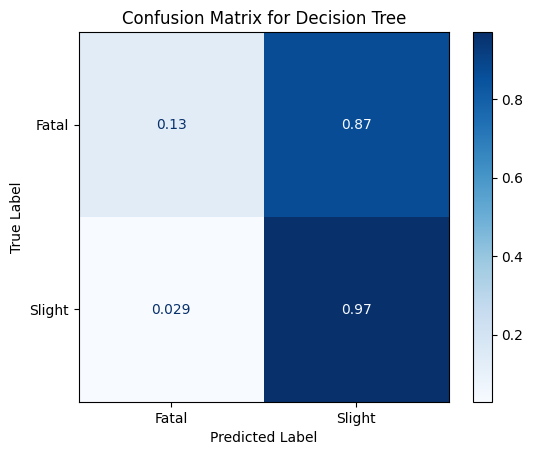

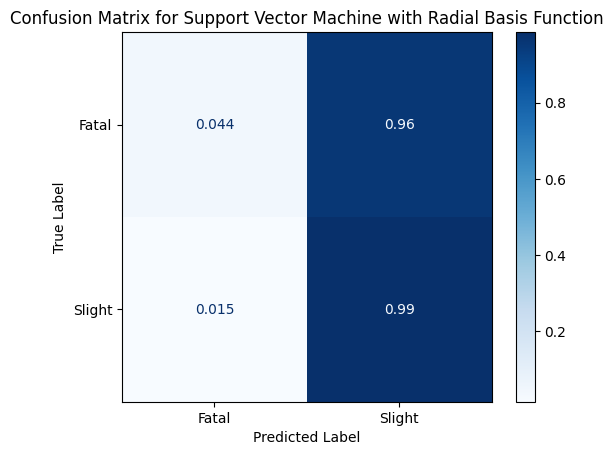

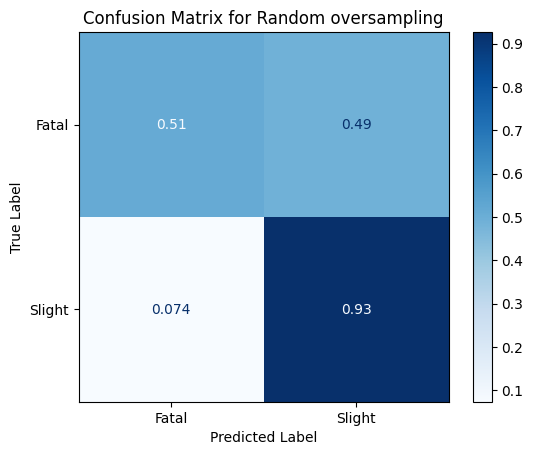

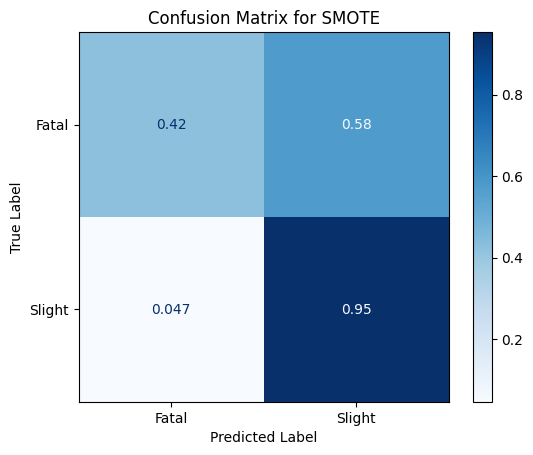

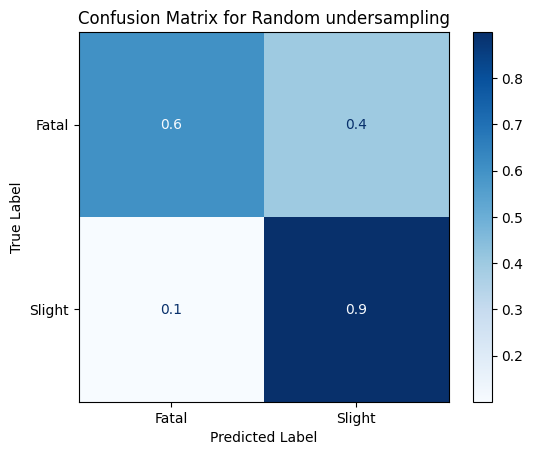

In [ ]:
# Define models
models1 = {
    "Decision Tree": best_dt,
    "Support Vector Machine with Radial Basis Function" :best_svm_rbf,
    "Random oversampling": ros_grid_search.best_estimator_,
    "SMOTE": os_grid_search.best_estimator_,
    "Random undersampling": rus_grid_search.best_estimator_
}

# Iterate over models
for name, model in models1.items():
    # Perform prediction on the test data
    yhat = model.predict(Xtest)

    # Calculate the confusion matrix
    cm = confusion_matrix(ytest, yhat)

    # Normalize the confusion matrix
    cm_normalized = normalize(cm, axis=1, norm='l1')

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues) # Plot the confusion matrix using Blues colormap
    plt.title(f"Confusion Matrix for {name}") # Title of the confusion matrix

    # Labels of the plot
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    # Show the plot
    plt.show()

On the test data, for under- and oversampling methods, the misclassification of the 'Fatal' class by the classifier is significantly reduced compared to the classifier trained on the unbalanced data. This enhances F-score.


# **5. Key Findings**

*   Initially, after merging the dataset, there are almost 170,000 recorded accidents. After data preprocessing, I obtained a dataset with 10,000 accident records. This may intuitively impact model accuracy.

*   The initial observation suggests that there is a substantial imbalance in the distribution of classes within the dataset. This results in a biassed model performance, where classifiers tend to favour the majority class. By applying random undersampling and oversampling techniques, such as SMOTE, the misclassification is reduced, improving F-score.

*   The results emphasise the significance of resolving class imbalance in classification problems.






# **6. Possible future improvements**


***Handling class imbalance in predictive modeling (Real world dataset are so imbalanced):***
*    To emphasize disparities between the minority and majority classes, consider crafting synthetic features that quantify divergence or similarity across various attributes (similarity scores based on metrics such as crash test results or vehicle safety features).
*    While random undersampling and SMOTE have proven effective, investigating more sophisticated sampling techniques Borderline-SMOTE could lead to additional enhancements.





***For car insurance company:***
*   Execute safety measures with a regional focus, which may entail the deployment of resources such as traffic enforcement units, emergency response teams, or enhancements to road infrastructure.

*   Create insurance premium structures that are tailored to specific age groups.

*   Implement speed limit awareness efforts specifically focused on regions with high accidents.





In [ ]:
# Complete a Timer
"---- The notebook is finished in %s minutes----"%((str(round((time.time() - start_time)/60,4))))

'---- The notebook is finished in 45.3315 minutes----'